In [3]:
import tensorflow as tf
tf.__version__

'1.10.0'

In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [8]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt

1.10.0


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9
num_class = 10

y = 5 Sandal


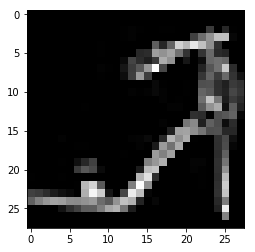

In [11]:
img_index = 8
label_index = int(y_train[img_index])
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(x_train[img_index].astype(np.uint8), cmap='gray')

In [14]:
y_train_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_hot =  tf.keras.utils.to_categorical(y_test, 10)
y_train_hot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation



In [44]:
x_train = x_train.reshape(60000,28,28,1)
x_train.shape



(60000, 28, 28, 1)

In [46]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add( Conv2D(100, 3, activation='relu', padding='same', input_shape=(28,28,1)) )
model.add( Conv2D(50, 3, activation='relu', padding='same') )
model.add( MaxPooling2D(2,2) )
model.add( Conv2D(50, 3, activation='relu', padding='same') )
model.add( MaxPooling2D(2,2) )
model.add( Flatten() )
model.add( Dense(10, activation='softmax') )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 28, 28, 100)       1000      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 50)        45050     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 50)        22550     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 2450)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                24510     
Total para

In [37]:
model = Sequential()
model.add( Flatten(input_shape = (28,28)) )
model.add( Dense(100, activation='sigmoid') )
model.add( Dense(100, activation='sigmoid') )
model.add( Dense(100, activation='sigmoid') )
model.add( Dense(10, activation='softmax') )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics=['accuracy'])

In [48]:
model.fit(x_train, y_train_hot, epochs=10, batch_size=200, shuffle=True, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 31s 643us/step - loss: 14.3759 - acc: 0.1058 - val_loss: 14.4633 - val_acc: 0.1027
Epoch 2/10
48000/48000 [==============================] - 27s 554us/step - loss: 12.2338 - acc: 0.1831 - val_loss: 0.7284 - val_acc: 0.7398
Epoch 3/10
48000/48000 [==============================] - 27s 564us/step - loss: 0.4989 - acc: 0.8264 - val_loss: 0.4317 - val_acc: 0.8463
Epoch 4/10
48000/48000 [==============================] - 27s 565us/step - loss: 0.3806 - acc: 0.8654 - val_loss: 0.3706 - val_acc: 0.8686
Epoch 5/10
48000/48000 [==============================] - 27s 566us/step - loss: 0.3358 - acc: 0.8811 - val_loss: 0.3587 - val_acc: 0.8721
Epoch 6/10
48000/48000 [==============================] - 27s 564us/step - loss: 0.3081 - acc: 0.8919 - val_loss: 0.3211 - val_acc: 0.8857
Epoch 7/10
48000/48000 [==============================] - 27s 564us/step - loss: 0.2873 - acc: 0.8979 - val_loss:

In [50]:
model.evaluate(x_train, y_train_hot)

60000/60000 [==============================] - 14s 239us/step


[0.2344557199796041, 0.9188666666666667]

In [53]:
x_test = x_test.reshape(10000,28,28,1)
model.evaluate(x_test, y_test_hot)

10000/10000 [==============================] - 3s 267us/step


[0.3003166943192482, 0.8952]

y = 5 Sandal


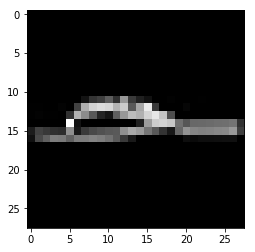

In [55]:
img_index = 8
label_index = int(y_test[img_index])
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(x_test[img_index,:,:,0].astype(np.uint8), cmap='gray')

In [58]:
pred = model.predict(x_test[img_index].reshape(1,28,28,1))
print(pred)
print(pred.argmax(-1))

[[2.5407859e-05 3.1499642e-06 1.5731560e-04 5.8786396e-04 9.1779833e-07
  9.9525142e-01 3.0473819e-05 3.0110921e-03 9.2335528e-04 9.0740987e-06]]
[5]
